# Importing Packages

In [1]:
import warnings

#provide a warning
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
%matplotlib inline

# Read the csv file into weather_df

In [2]:
weather_df = pd.read_csv("E:\Desktop\MachineLearning\datasets\weather_prediction_dataset.csv", parse_dates = ['DATE'], index_col='DATE')
weather_df.head()

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


# Checking columns

In [3]:
weather_df.columns


Index(['MONTH', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=164)

# Checking Shape

In [4]:
weather_df.shape

(3654, 164)

# Describing the dataframe

In [5]:
weather_df.describe()

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


# Checking for null values in the dataframe/dataset

In [6]:
weather_df.isnull().any()

MONTH                     False
BASEL_cloud_cover         False
BASEL_humidity            False
BASEL_pressure            False
BASEL_global_radiation    False
                          ...  
TOURS_global_radiation    False
TOURS_precipitation       False
TOURS_temp_mean           False
TOURS_temp_min            False
TOURS_temp_max            False
Length: 164, dtype: bool

# Separate the features that predict the weather from the rest of the features and create a new dataframe

In [7]:
weather_df_new = weather_df.loc[:,['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max']]
weather_df_new.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
DATE,,,,,,,,,,,,,,,,,,,
2000-01-01,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
2000-01-02,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2000-01-03,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
2000-01-04,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
2000-01-05,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


# Checking shape of new dataframe

In [8]:
weather_df_new.shape

(3654, 19)

# Checking columns in new dataframe

In [9]:
weather_df_new.columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object')

# Plotting all the column values w.r.t DATE column

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

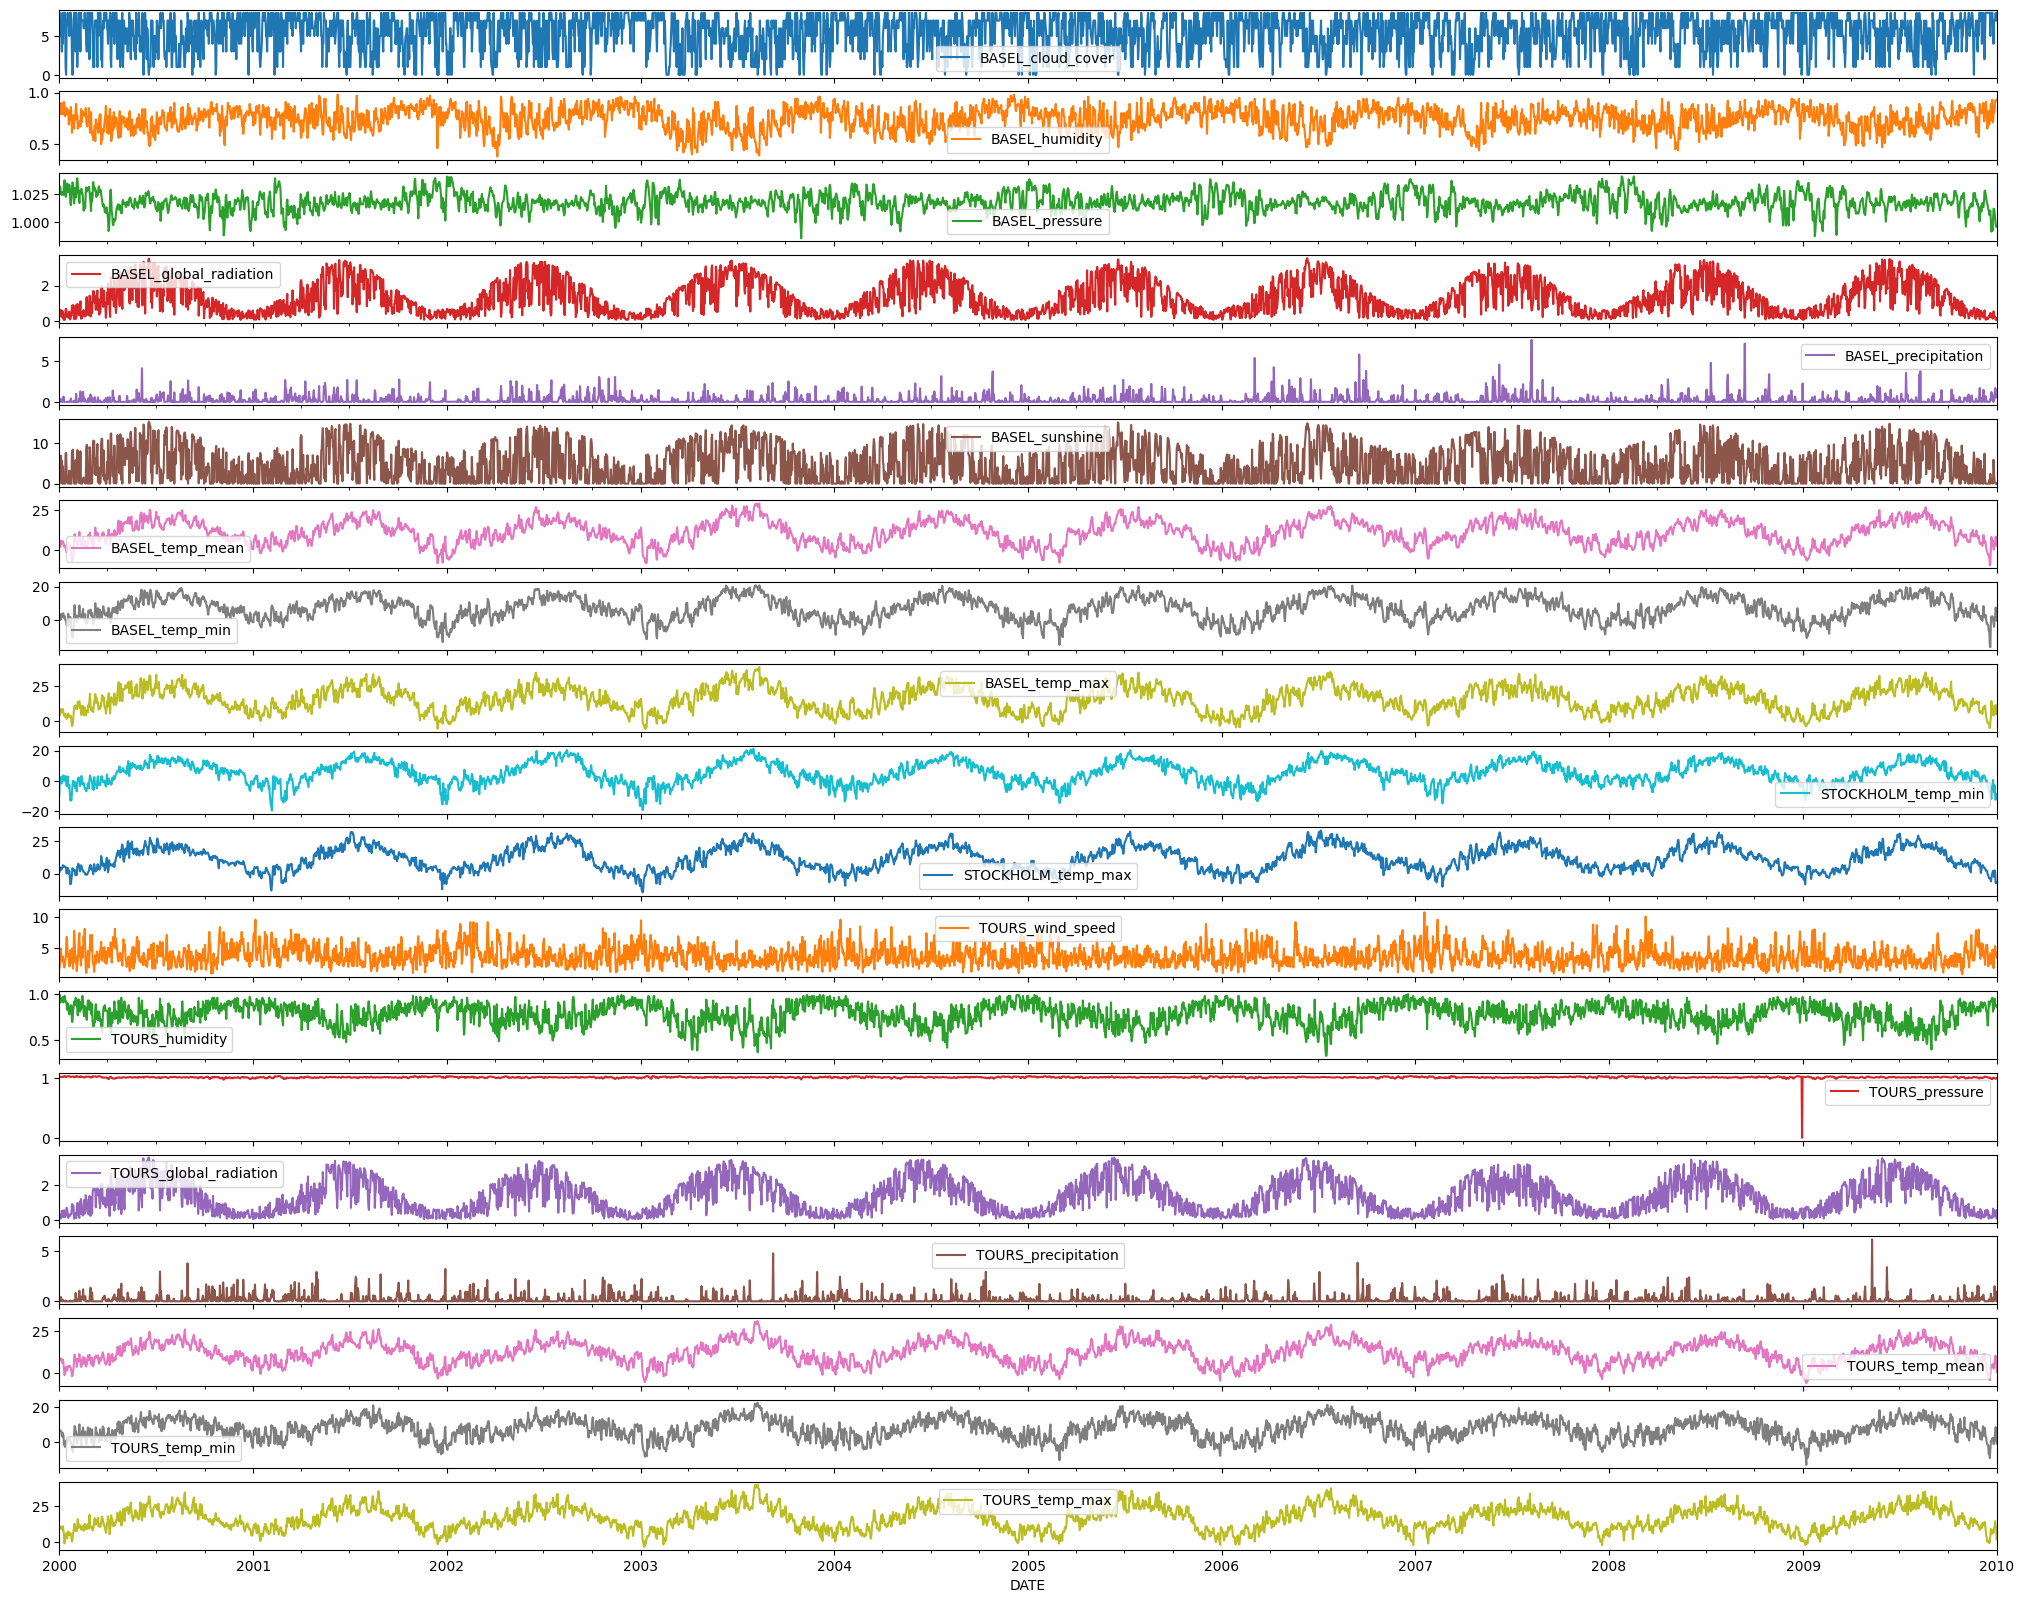

In [10]:
weather_df_new.plot(subplots=True, figsize=(25,20))

# Plotting column values for 1 year

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

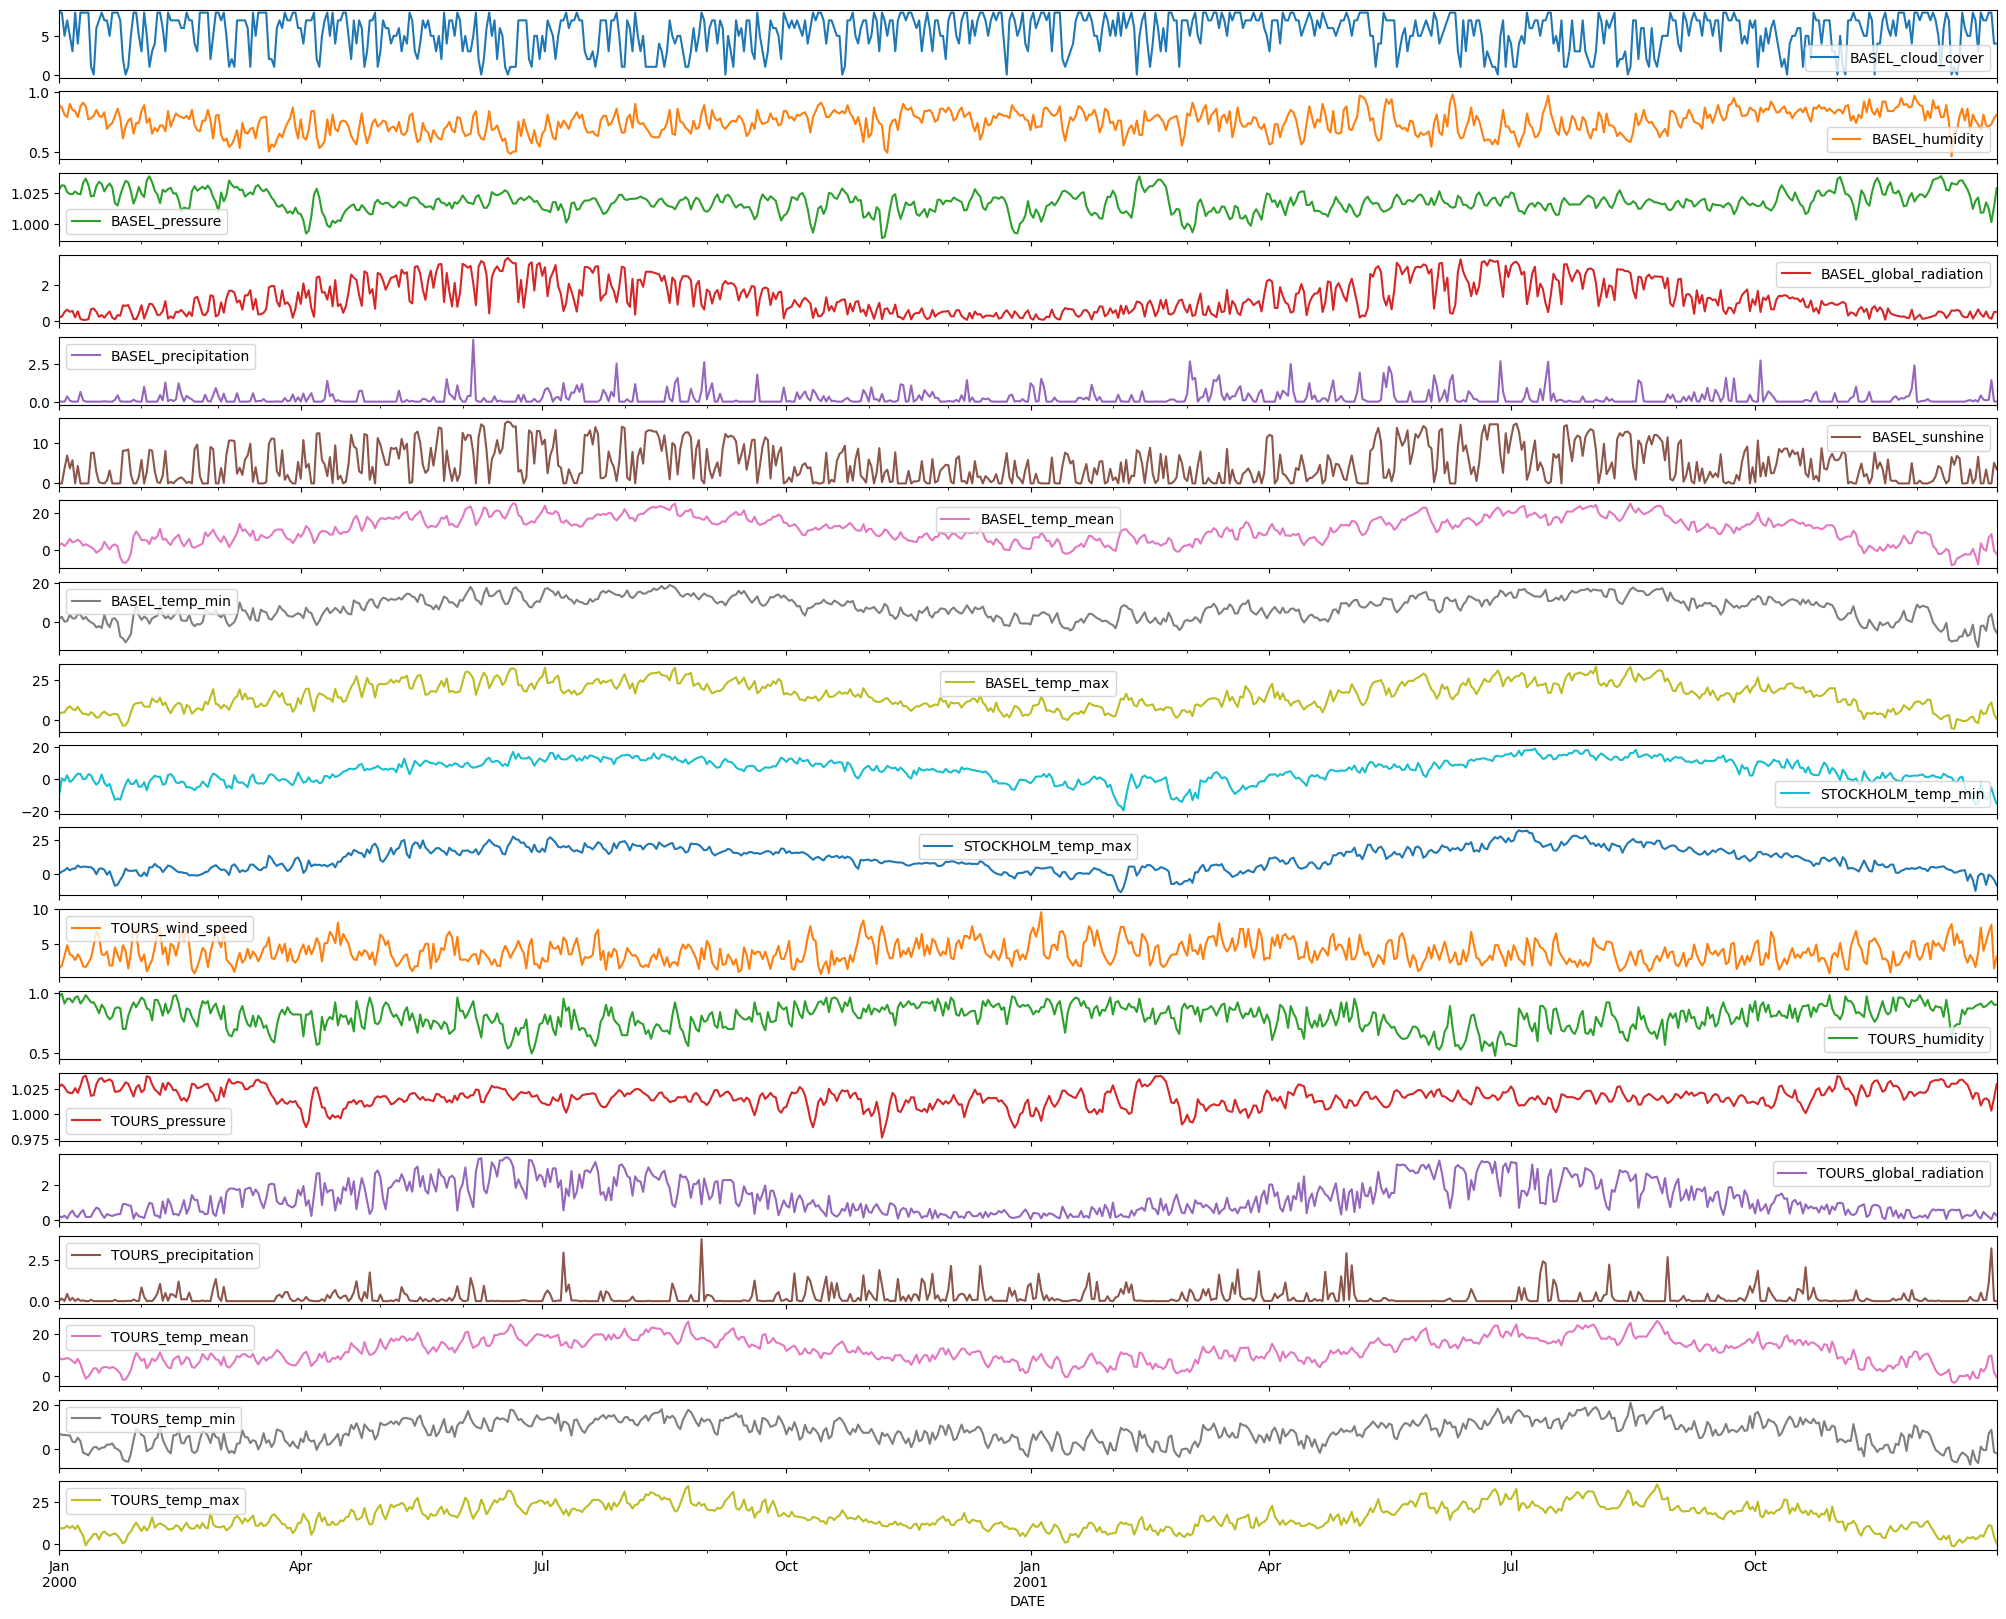

In [11]:
weather_df_new['2000':'2001'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))


# Hist plots

array([[<Axes: title={'center': 'BASEL_cloud_cover'}>,
        <Axes: title={'center': 'BASEL_humidity'}>,
        <Axes: title={'center': 'BASEL_pressure'}>,
        <Axes: title={'center': 'BASEL_global_radiation'}>],
       [<Axes: title={'center': 'BASEL_precipitation'}>,
        <Axes: title={'center': 'BASEL_sunshine'}>,
        <Axes: title={'center': 'BASEL_temp_mean'}>,
        <Axes: title={'center': 'BASEL_temp_min'}>],
       [<Axes: title={'center': 'BASEL_temp_max'}>,
        <Axes: title={'center': 'STOCKHOLM_temp_min'}>,
        <Axes: title={'center': 'STOCKHOLM_temp_max'}>,
        <Axes: title={'center': 'TOURS_wind_speed'}>],
       [<Axes: title={'center': 'TOURS_humidity'}>,
        <Axes: title={'center': 'TOURS_pressure'}>,
        <Axes: title={'center': 'TOURS_global_radiation'}>,
        <Axes: title={'center': 'TOURS_precipitation'}>],
       [<Axes: title={'center': 'TOURS_temp_mean'}>,
        <Axes: title={'center': 'TOURS_temp_min'}>,
        <Axes: titl

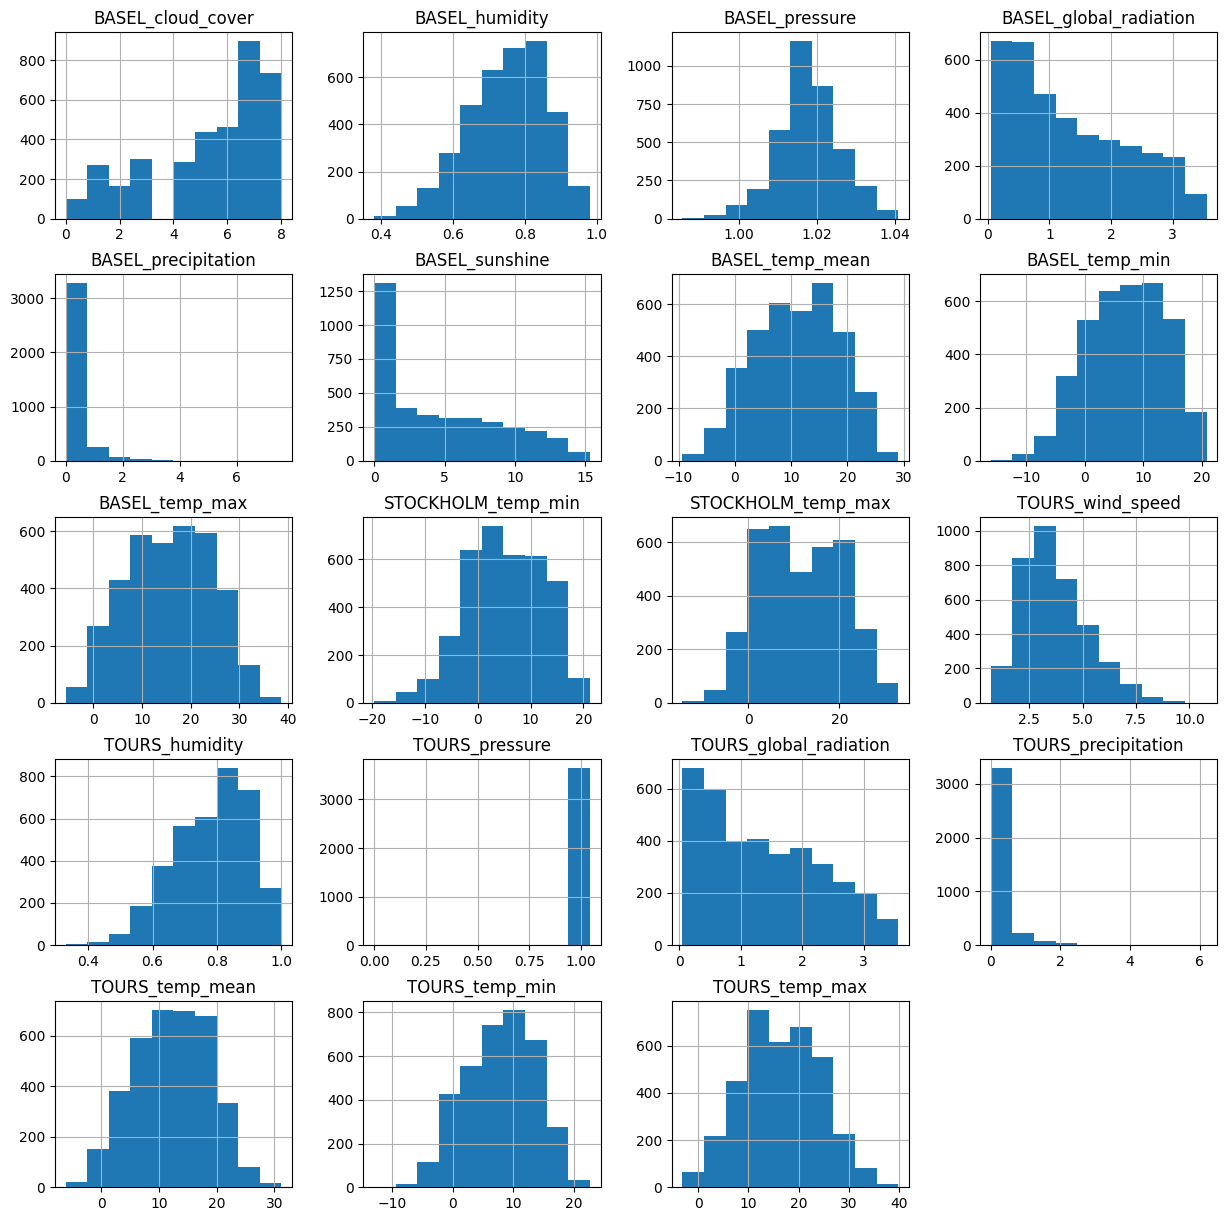

In [12]:
weather_df_new.hist(bins=10,figsize=(15,15))


In [13]:
weather_2000_2001 = weather_df_new['2000':'2001']
weather_2000_2001.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
DATE,,,,,,,,,,,,,,,,,,,
2000-01-01,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
2000-01-02,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2000-01-03,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
2000-01-04,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
2000-01-05,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [14]:

weather_y = weather_df_new.pop("TOURS_temp_min")
weather_x = weather_df_new

## Dataset is prepared and is ready to be fed to the model for training

## Split the dataset into training and testing

In [15]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)


In [16]:
train_X.shape

(2923, 18)

In [17]:
train_y.shape

(2923,)

In [18]:
train_y.head()

DATE
2003-11-06     4.5
2004-03-19     7.8
2000-09-25    10.2
2004-12-22     1.2
2006-09-05    16.7
Name: TOURS_temp_min, dtype: float64

# Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [20]:
prediction1=regressor.predict(test_X)
np.mean(np.absolute(prediction1-test_y))

0.5759233926128591

In [21]:
#variance
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


# Calculating R2-score for Decision Tree Regression

In [22]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction1 ) )

Mean absolute error: 0.58
Residual sum of squares (MSE): 0.65
R2-score: 0.98


# The final score of the model using Decision Tree Regression

In [23]:
score = regressor.score(test_X,test_y)

In [24]:
print(f"the score of the model for weather prediction is: {score*100:.2f}%")

the score of the model for weather prediction is: 98.00%


# Table for predictions for decision tree regression

In [25]:
for i in range(len(prediction1)):
  prediction1[i]=round(prediction1[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction1,'diff':(test_y-prediction1)})

,Actual,Prediction,diff
DATE,,,
2007-09-02,10.2,9.8,0.4
2008-12-11,-1.5,-1.3,-0.2
2000-11-27,6.6,6.8,-0.2
2003-06-03,15.3,14.8,0.5
2001-02-13,6.7,6.4,0.3
...,...,...,...
2007-06-07,14.9,14.3,0.6
2008-10-11,7.9,8.1,-0.2
2003-02-10,3.0,2.9,0.1


# Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
reg.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [27]:
prediction = reg.predict(test_X)
np.mean(np.absolute(prediction - test_y))

0.309369357045144

In [28]:
print('Variance score: %.2f' % reg.score(test_X, test_y))


Variance score: 0.99


# Calculating R2-score for Random Forest Regression

In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.31
Residual sum of squares (MSE): 0.21
R2-score: 0.99


# The final score of the model using Random Forest Regression

In [30]:
score = reg.score(test_X,test_y)

In [31]:
print(f"the score of the model for weather prediction is: {score*100:.2f}%")

the score of the model for weather prediction is: 99.34%


# Comparing prediction values of the model with actual target values

In [32]:
ypreds = reg.predict(test_X)
ypreds[:20]

array([10.285, -1.48 ,  6.967, 15.066,  6.259, 12.492,  2.744,  0.892,
        4.762, -1.669, 10.96 , 12.99 ,  8.453,  6.456,  7.048,  4.685,
        8.778, 15.387, 17.569,  6.572])

In [33]:
np.array([test_y[:20]])

array([[10.2, -1.5,  6.6, 15.3,  6.7, 12.6,  2.9,  1.1,  4.8, -2.5, 10.8,
        12.8,  8.5,  6.3,  6.9,  5. ,  8.9, 15.7, 17.3,  6.5]])

# Table for predictions for random forest

In [34]:
predvstest = pd.DataFrame(data = {"actual" : test_y, "predicted" : ypreds})
predvstest["differences"] = predvstest["predicted"] - predvstest["actual"]
predvstest

,actual,predicted,differences
DATE,,,
2007-09-02,10.2,10.285,0.085
2008-12-11,-1.5,-1.480,0.020
2000-11-27,6.6,6.967,0.367
2003-06-03,15.3,15.066,-0.234
2001-02-13,6.7,6.259,-0.441
...,...,...,...
2007-06-07,14.9,14.538,-0.362
2008-10-11,7.9,8.624,0.724
2003-02-10,3.0,2.814,-0.186
